In [2]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
from cycler import cycler
import matplotlib as mpl

wandb_id = "" # YOUR WANDB ID
api = wandb.Api()
project = "FedResFinal"
runs = api.runs(f"{wandb_id}/{project}")
all_runs = []
for run in runs:
    if run.State=="finished" and run.config["heterogeneity"]=="dir" and run.config["imbalance"]:
        config = {**run.config}
        for client in tqdm(range(config["n_workers"])):
            run_dict = {}
            summary = {**run.summary}
            run_dict = {**run_dict, **config, **summary, "client":client,
                        "lambda":summary[f"lambda/client_{client}"], "run": run.id}
            #run_dict["slack_diff"] = 
            all_runs.append(run_dict)
df = pd.DataFrame(all_runs)               

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1584.81it/s]


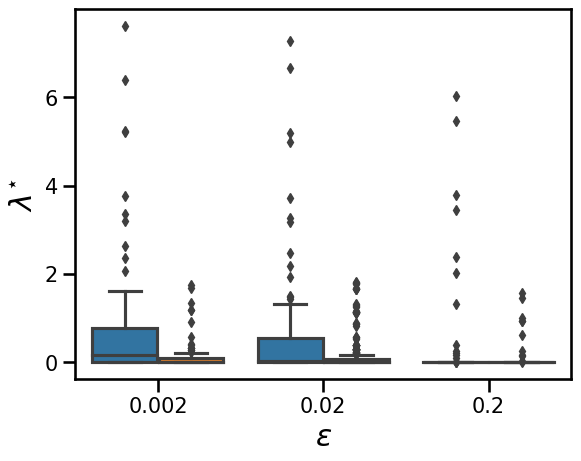

In [6]:
df = df[df["dataset"]=="cifar10"]
mpl.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=1.2)
query_df = df.query("n_minority==3 and  perturbation_penalty==2.0 and reduce_to_ratio==0.1 and tolerance_epsilon>=0.002")
query_df = query_df.replace({"imbalance-fl": "Constrained", "imbalance-fl-res": "Resilient"})
query_df["Formulation"] =query_df["formulation"]
query_df = query_df.sort_values("Formulation")
ax = sns.boxplot(data=query_df, y="lambda", x="tolerance_epsilon", hue="Formulation")
ax.get_legend().remove()
ax.tick_params(axis="x",  labelsize=15)
ax.tick_params(axis="y",  labelsize=15)
plt.ylabel("$\lambda^{\star}$")
plt.xlabel("$\epsilon$")
plt.savefig("Lambda_vs_eps.pdf", dpi=250,  bbox_inches="tight")
#plt.ylim((0.86, 0.93))

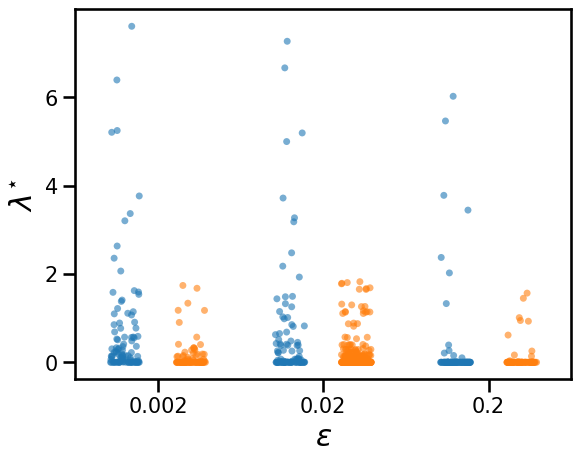

In [30]:
df = df[df["dataset"]=="cifar10"]
mpl.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=1.2)
query_df = df.query("n_minority==3 and  perturbation_penalty==2.0 and reduce_to_ratio==0.1 and tolerance_epsilon>=0.002")
query_df = query_df.replace({"imbalance-fl": "Constrained", "imbalance-fl-res": "Resilient"})
query_df["Formulation"] =query_df["formulation"]
query_df = query_df.sort_values("Formulation")
query_df["lambda"] = query_df["lambda"]+10e-7
ax = sns.stripplot(data=query_df, y="lambda", x="tolerance_epsilon", hue="Formulation", alpha=0.6, dodge=True, jitter=0.18)
ax.get_legend().remove()
ax.tick_params(axis="x",  labelsize=15)
ax.tick_params(axis="y",  labelsize=15)
plt.ylabel("$\lambda^{\star}$")
plt.xlabel("$\epsilon$")
plt.savefig("Lambda_vs_eps_STRIP.pdf", dpi=250,  bbox_inches="tight")
#plt.ylim((0.86, 0.93))

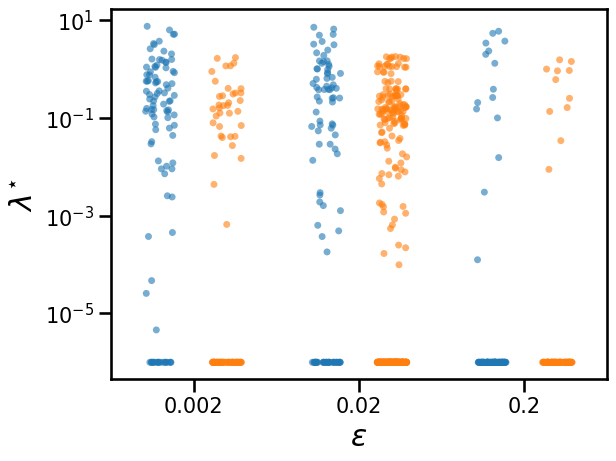

In [29]:
df = df[df["dataset"]=="cifar10"]
mpl.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=1.2)
query_df = df.query("n_minority==3 and  perturbation_penalty==2.0 and reduce_to_ratio==0.1 and tolerance_epsilon>=0.002")
query_df = query_df.replace({"imbalance-fl": "Constrained", "imbalance-fl-res": "Resilient"})
query_df["Formulation"] =query_df["formulation"]
query_df = query_df.sort_values("Formulation")
query_df["lambda"] = query_df["lambda"]+10e-7
ax = sns.stripplot(data=query_df, y="lambda", x="tolerance_epsilon", hue="Formulation", alpha=0.6, dodge=True, jitter=0.18)
ax.get_legend().remove()
ax.tick_params(axis="x",  labelsize=15)
ax.tick_params(axis="y",  labelsize=15)
plt.yscale("log")
plt.ylabel("$\lambda^{\star}$")
plt.xlabel("$\epsilon$")
plt.savefig("Lambda_vs_eps_log.pdf", dpi=250,  bbox_inches="tight")
#plt.ylim((0.86, 0.93))

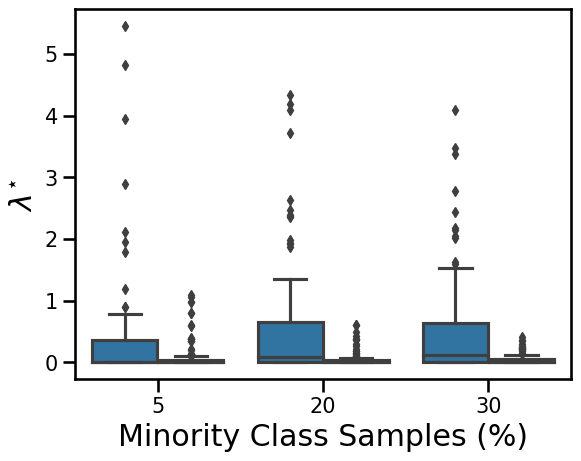

In [17]:
df = df[df["dataset"]=="cifar10"]
mpl.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=1.2)
query_df = df.query("n_minority==3 and  perturbation_penalty==1.0 and tolerance_epsilon==0.02 and reduce_to_ratio>0.01 and reduce_to_ratio!=0.1")
query_df = query_df.replace({"imbalance-fl": "Constrained", "imbalance-fl-res": "Resilient"})
query_df["Formulation"] =query_df["formulation"]
query_df = query_df.sort_values("Formulation")
query_df["reduce_to_ratio"] = 100*query_df["reduce_to_ratio"]
query_df["reduce_to_ratio"] = query_df["reduce_to_ratio"].astype(int)
ax = sns.boxplot(data=query_df, y="lambda", x="reduce_to_ratio", hue="Formulation")
ax.get_legend().remove()
ax.tick_params(axis="x",  labelsize=15)
ax.tick_params(axis="y",  labelsize=15)
plt.ylabel("$\lambda^{\star}$")
plt.xlabel("Minority Class Samples (%)")
plt.savefig("Lambda_vs_ratio.pdf", dpi=250,  bbox_inches="tight")

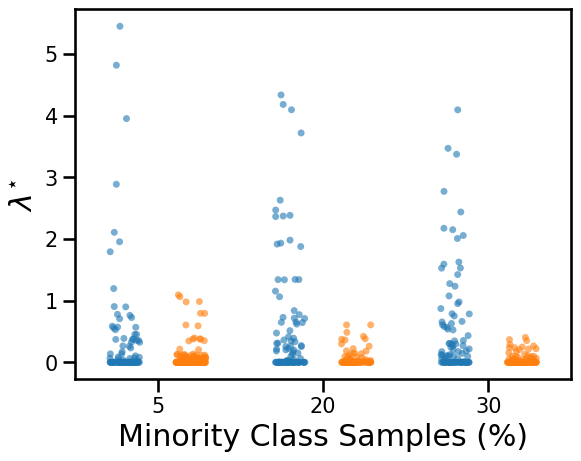

In [32]:
df = df[df["dataset"]=="cifar10"]
mpl.rcParams['lines.linewidth'] = 1.8
sns.set_context("talk", font_scale=1.2)
query_df = df.query("n_minority==3 and  perturbation_penalty==1.0 and tolerance_epsilon==0.02 and reduce_to_ratio>0.01 and reduce_to_ratio!=0.1")
query_df = query_df.replace({"imbalance-fl": "Constrained", "imbalance-fl-res": "Resilient"})
query_df["Formulation"] =query_df["formulation"]
query_df = query_df.sort_values("Formulation")
query_df["reduce_to_ratio"] = 100*query_df["reduce_to_ratio"]
query_df["reduce_to_ratio"] = query_df["reduce_to_ratio"].astype(int)
ax = sns.stripplot(data=query_df, y="lambda", x="reduce_to_ratio", hue="Formulation",  alpha=0.6, dodge=True, jitter=0.18)
ax.get_legend().remove()
ax.tick_params(axis="x",  labelsize=15)
ax.tick_params(axis="y",  labelsize=15)
plt.ylabel("$\lambda^{\star}$")
plt.xlabel("Minority Class Samples (%)")
plt.savefig("Lambda_vs_ratio_strip.pdf", dpi=250,  bbox_inches="tight")